# TP Bagging, Boosting, Random Forests
* Robin Masliah

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

### Q1 - Mettez en œuvre le Bagging avec des arbres de profondeur 1 (en Anglais stumps), puis avec des arbres plus profonds, en partant du code ci-dessous. On pourra utiliser BaggingRegressor.

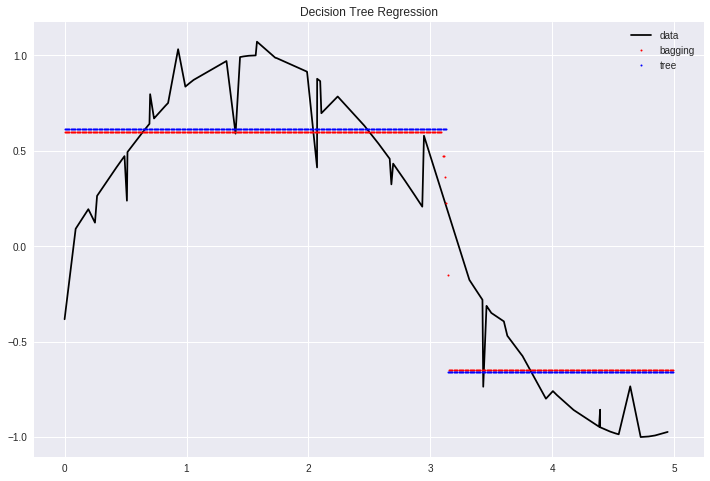

In [2]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))  # 1/5 lignes
n_estimators = 10  # L in the text
tree_max_depth = 1
bagging_max_depth = 10

# define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=tree_max_depth)
tree.fit(X, y)

bagging = BaggingRegressor(n_estimators=n_estimators, base_estimator=tree)
bagging.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)


# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, c="k", label="data")
plt.plot(X_test, y_bagging, 'o', label="bagging",  color='red', markersize=2)
plt.plot(X_test, y_tree, 'o', label="tree",  color='blue', markersize=2)

# add plots for Bagging/Tree
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

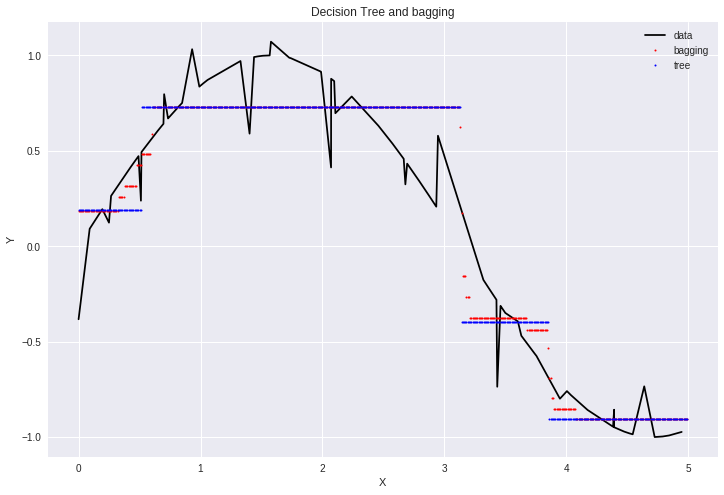

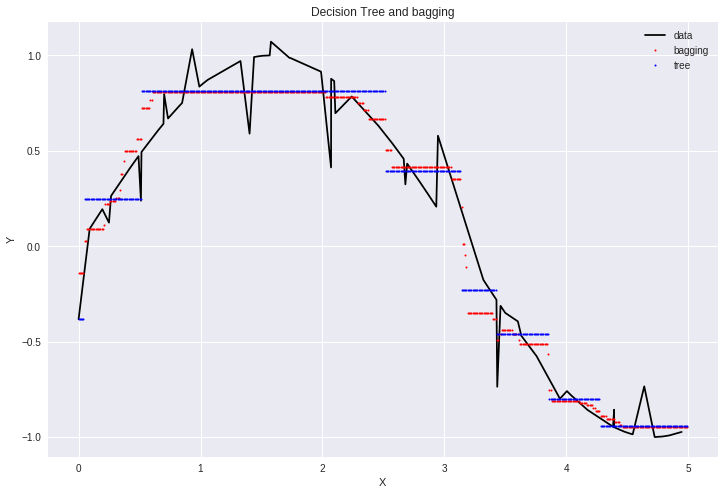

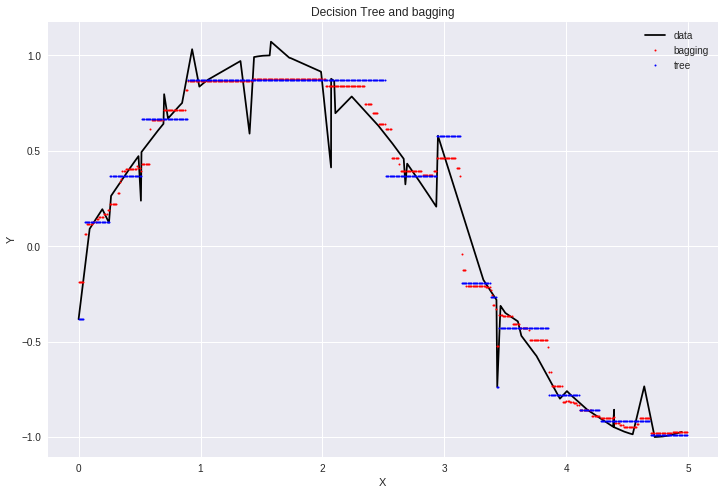

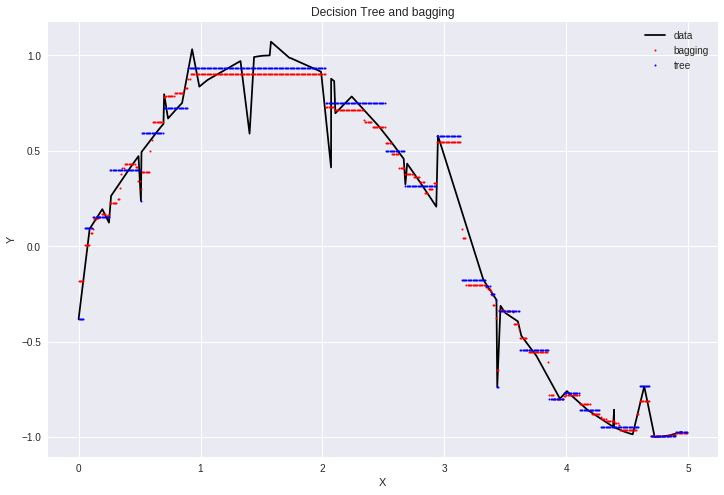

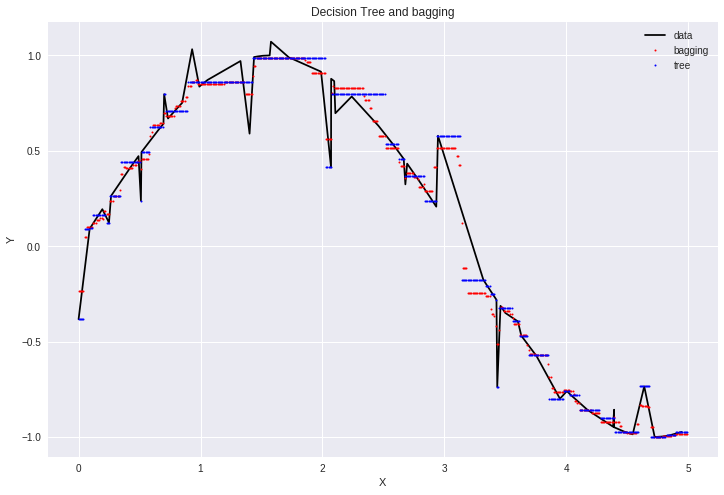

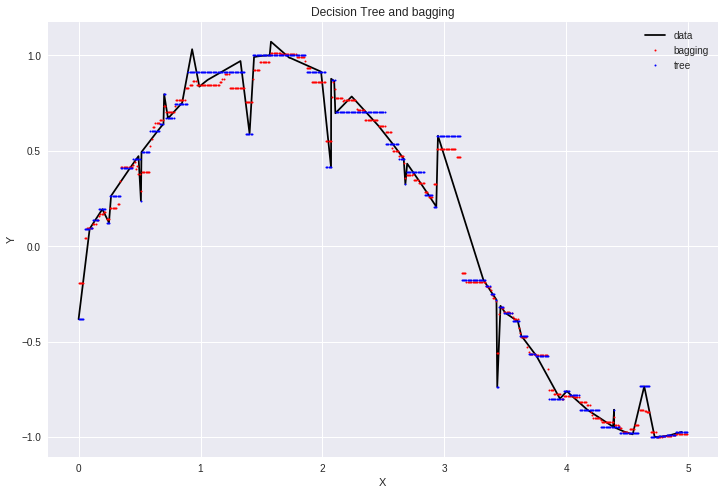

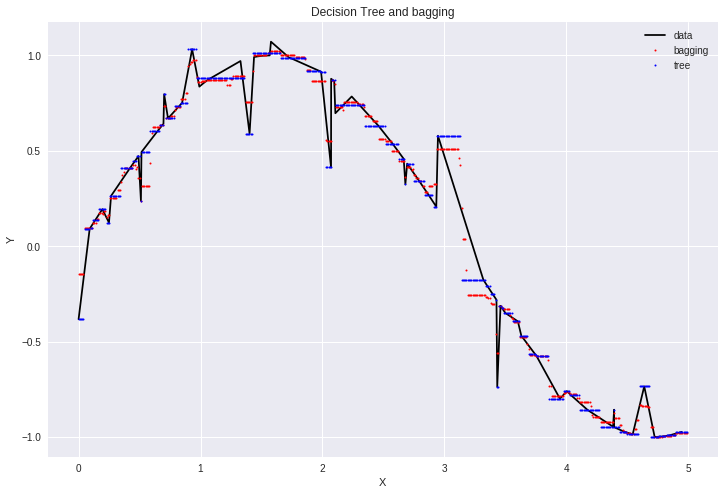

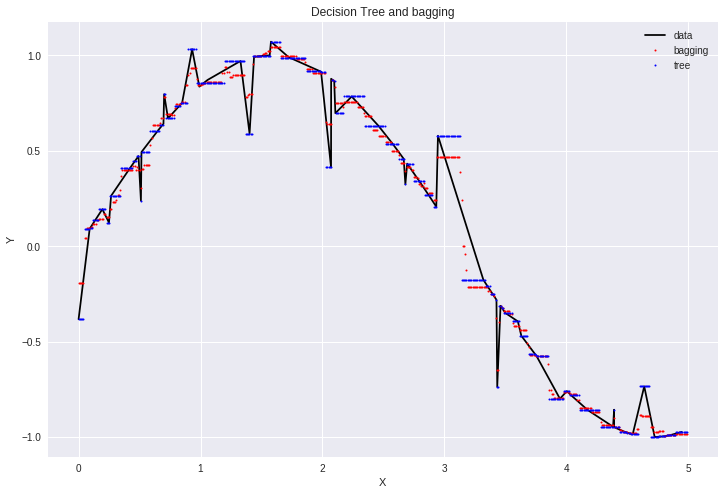

In [3]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))  # 1/5 lignes
n_estimators = 10  # L in the text
tree_max_depth = range(2, 10)
bagging_max_depth = 10


for i in tree_max_depth:
    # define the regressor by bagging stumps
    tree = DecisionTreeRegressor(max_depth=i)
    tree.fit(X, y)

    bagging = BaggingRegressor(n_estimators=n_estimators, base_estimator=tree)
    bagging.fit(X, y)

    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test)

    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.plot(X, y, c="k", label="data")
    plt.plot(X_test, y_bagging, 'o', label="bagging",
             color='red', markersize=2)
    plt.plot(X_test, y_tree, 'o', label="tree",  color='blue', markersize=2)

    # add plots for Bagging/Tree
    plt.title("Decision Tree and bagging")
    plt.legend(loc=1, numpoints=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

### Q2 - Illustrer graphiquement le rôle de L ainsi que de la profondeur des arbres (max_depth).

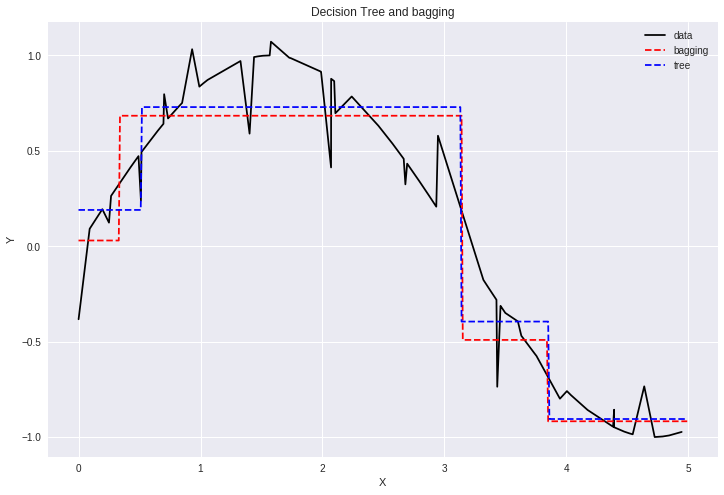

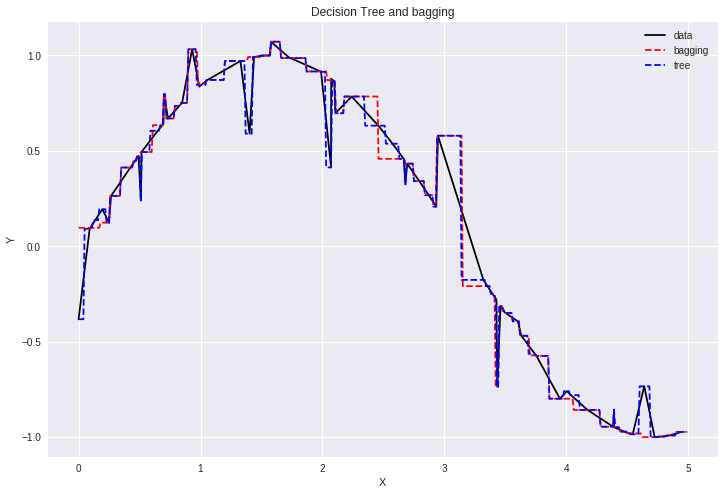

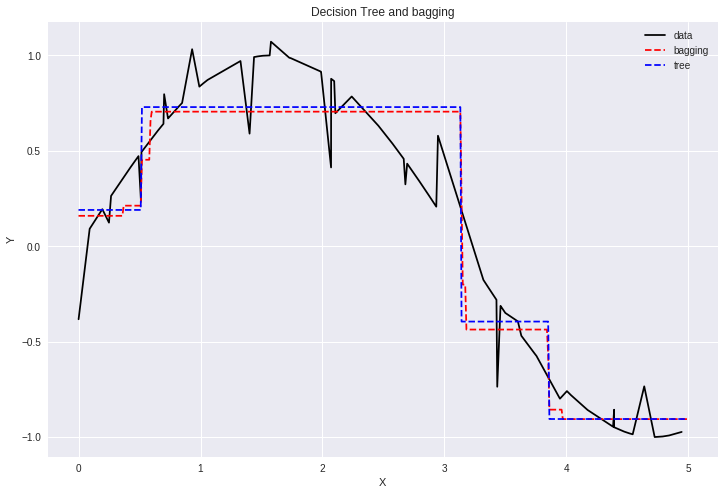

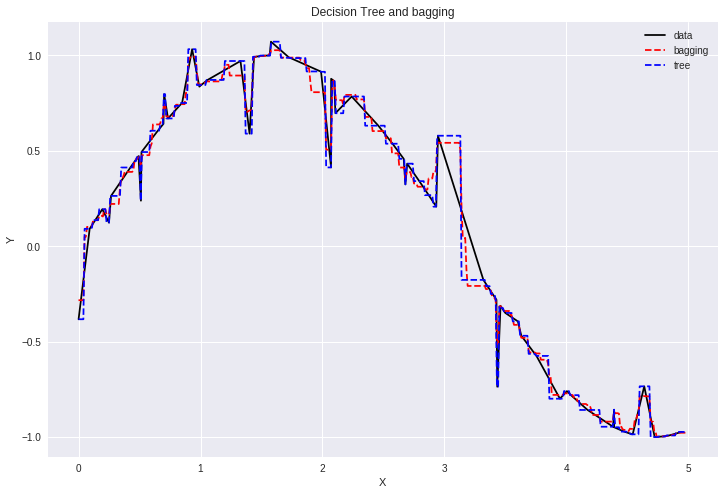

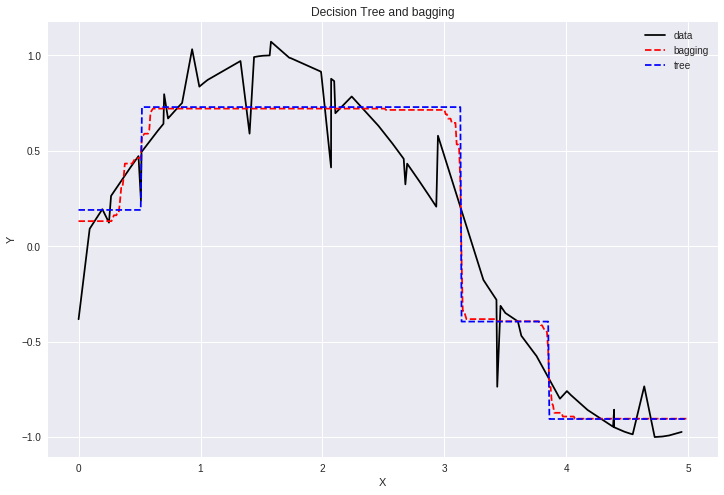

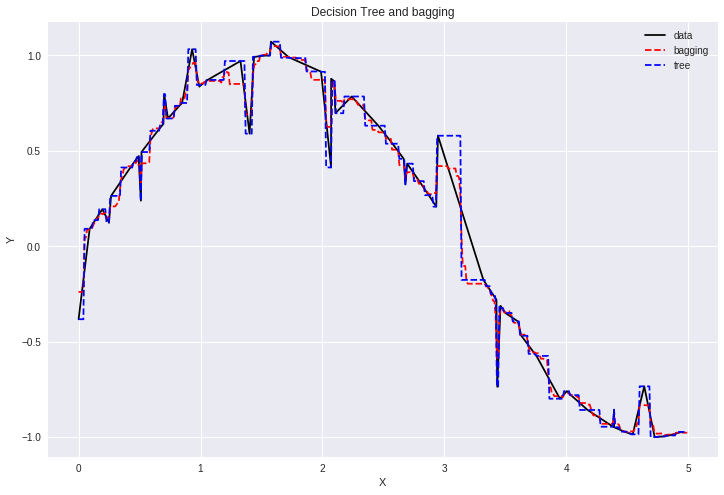

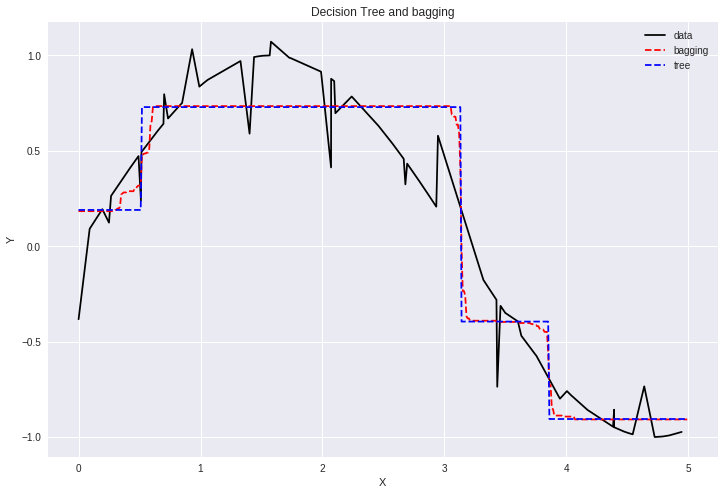

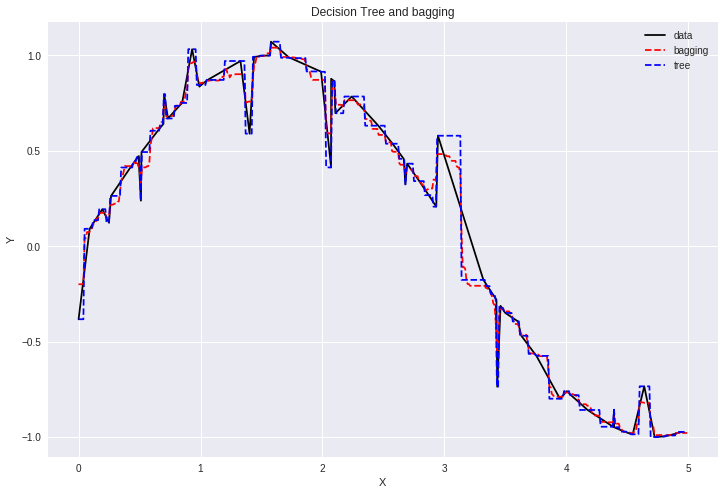

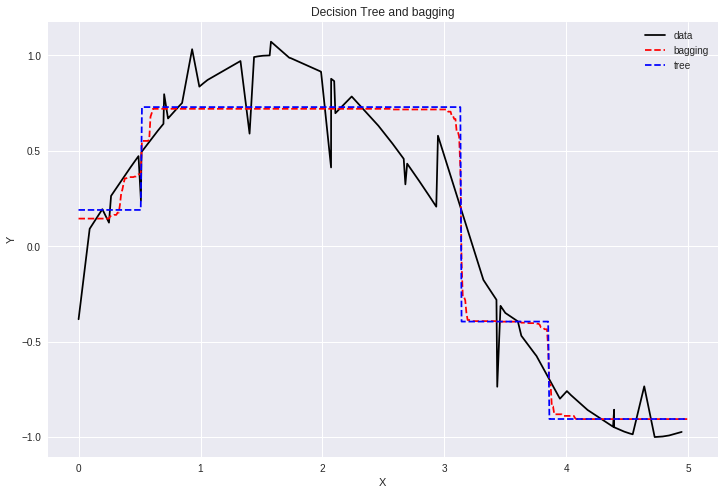

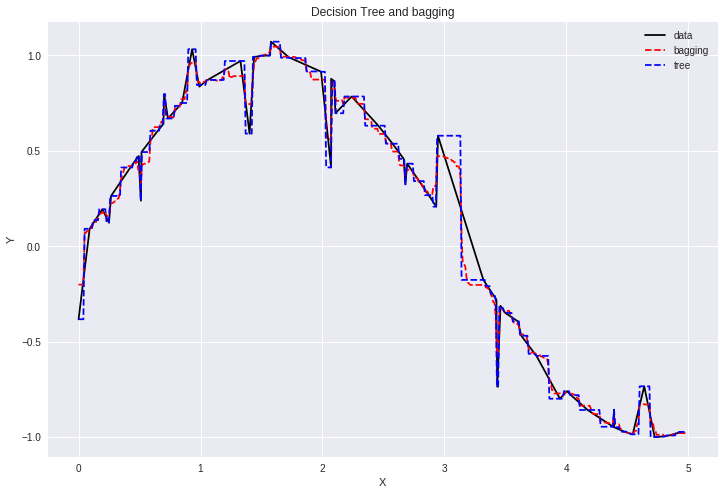

In [4]:
lst_n_estimators = [1, 10, 50, 100, 200]
tree_max_depth = [2, 10]
bagging_max_depth = [2, 10]

fig = plt.figure(figsize=(24, 64))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

for i, n_estimators in enumerate(lst_n_estimators):
    for j, max_depth in enumerate(tree_max_depth):
        # define the regressor by bagging stumps
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(X, y)

        bagging = BaggingRegressor(
            n_estimators=n_estimators, base_estimator=tree)
        bagging.fit(X, y)

        # Predict
        X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
        y_tree = tree.predict(X_test)
        y_bagging = bagging.predict(X_test)

        # Plot the results
        plt.figure(figsize=(12, 8))
        plt.plot(X, y, c="k", label="data")
        plt.plot(X_test, y_bagging, '--', label="bagging",
                 color='red', markersize=1)
        plt.plot(X_test, y_tree, '--', label="tree",
                 color='blue', markersize=1)

        # add plots for Bagging/Tree
        plt.title("Decision Tree and bagging")
        plt.legend(loc=1, numpoints=1)
        plt.xlabel('X')
        plt.ylabel('Y')

plt.show()

* Plus la profondeur est grande plus les valeurs prédites collent aux données.

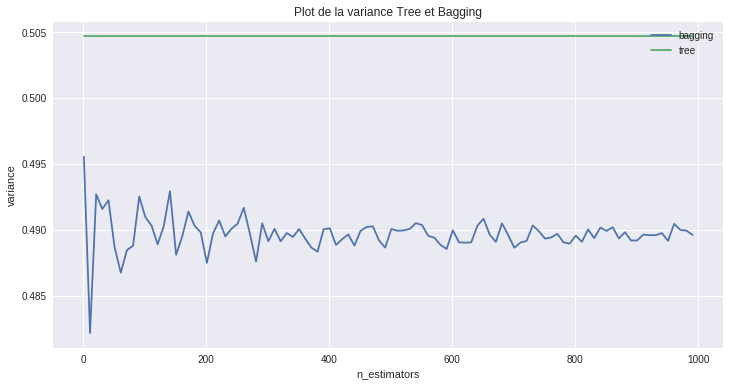

In [5]:
# Calcul de la variance pour bagging et arbres
lst_n_estimators = np.arange(1, 1000, 10)

tree_var = np.zeros(len(lst_n_estimators))
bagging_var = np.zeros(len(lst_n_estimators))

fig = plt.figure(figsize=(12, 6))
for j, n_estimators in enumerate(lst_n_estimators):
    # define the regressor by bagging stumps
    tree = DecisionTreeRegressor(max_depth=10)
    tree.fit(X, y)

    bagging = BaggingRegressor(n_estimators=n_estimators, base_estimator=tree)
    bagging.fit(X, y)

    # Compute Variance
    tree_var[j] = np.var(tree.predict(X_test))
    bagging_var[j] = np.var(bagging.predict(X_test))

plt.plot(lst_n_estimators, bagging_var, label="bagging")
plt.plot(lst_n_estimators, tree_var, label="tree")
plt.title('Plot de la variance Tree et Bagging')
plt.legend(loc=1, numpoints=1)
plt.xlabel('n_estimators')
plt.ylabel('variance')

plt.show()

* Plus on met d'arbre plus on réduit la variance.

### Q3 - A quoi reconnaît-on que les estimateurs construits par les arbres sont biaisés et que le bagging réduit leur variance ?

On bien grâce aux questions 1 et 2 que les estimateurs construits par les arbres sont biaisés dû à l'augmentation de la profondeur. De plus, le nombre d'estimateur n'a pas d'influence. La variance du bagging est strictement infèrieur à celle des arbres de décisions.

### Q4 - En jouant sur le niveau de bruit mettez en évidence le sur-apprentissage.

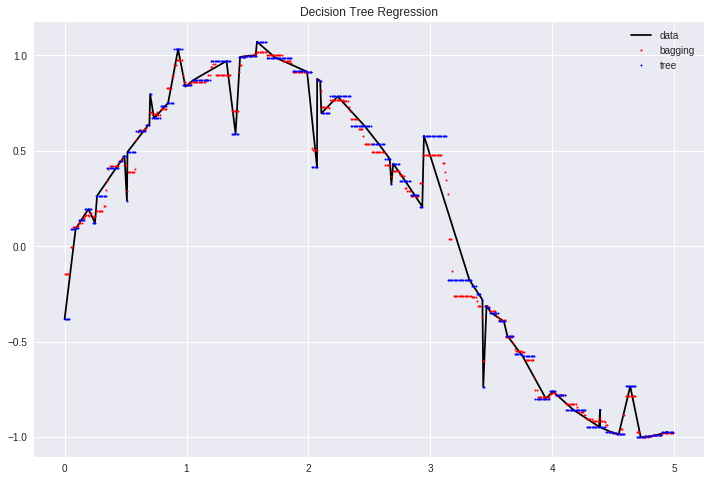

In [6]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10  # L in the text
tree_max_depth = 10
bagging_max_depth = 10


# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=tree_max_depth)
tree.fit(X, y)

bagging = BaggingRegressor(n_estimators=10, base_estimator=tree)
bagging.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, c="k", label="data")
plt.plot(X_test, y_bagging, 'o', label="bagging",  color='red', markersize=2)
plt.plot(X_test, y_tree, 'o', label="tree", color='blue', markersize=2)

# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

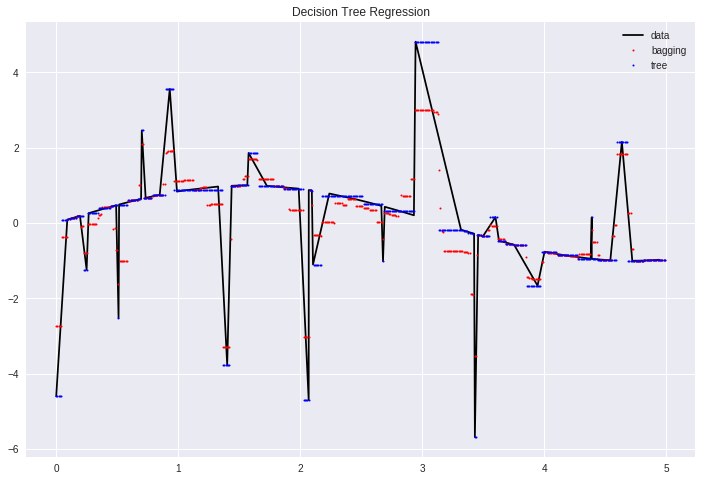

In [7]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 12 * (0.5 - rng.rand(16))
n_estimators = 10  # L in the text
tree_max_depth = 10
bagging_max_depth = 10


# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=tree_max_depth)
tree.fit(X, y)

bagging = BaggingRegressor(n_estimators=10, base_estimator=tree)
bagging.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, c="k", label="data")
plt.plot(X_test, y_bagging, 'o', label="bagging",  color='red', markersize=2)
plt.plot(X_test, y_tree, 'o', label="tree", color='blue', markersize=2)

# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

* Plus le bruit est grand moins il y a de sur-apprentissage. L'algorithme deviendra plus sensible aux outliers.

### Q5 - Observer qu’on peut réduire ce phénomène en sous-échantillonnant aléatoirement (sans remise) au lieu de prendre des échantillons bootstrap.

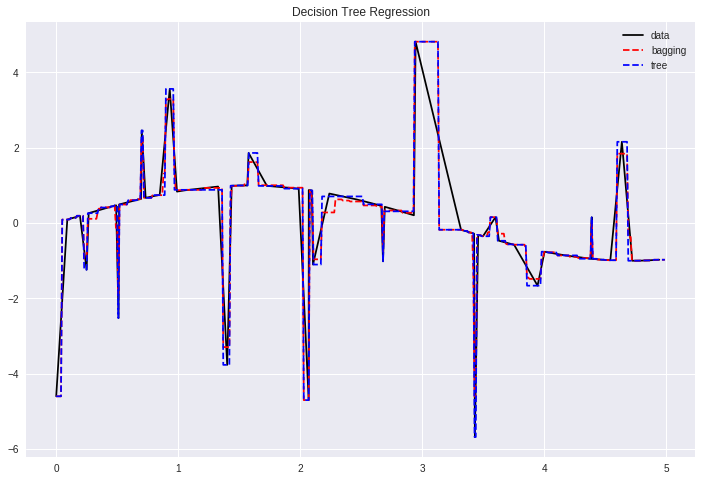

In [8]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 12 * (0.5 - rng.rand(16))
n_estimators = 1  # L in the text
tree_max_depth = 10
bagging_max_depth = 10


# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=tree_max_depth)
tree.fit(X, y)

bagging = BaggingRegressor(
    n_estimators=10, base_estimator=tree, bootstrap=False, max_samples=0.9)
bagging.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, c="k", label="data")
plt.plot(X_test, y_bagging, '--', label="bagging", color='red', markersize=3)
plt.plot(X_test, y_tree, '--', label="tree", color='blue', markersize=3)

# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

* En enlevant le bootstrap on voit que le phénomène de surapprentissage n'est plus aussi conséquent surtout avec le bagging.

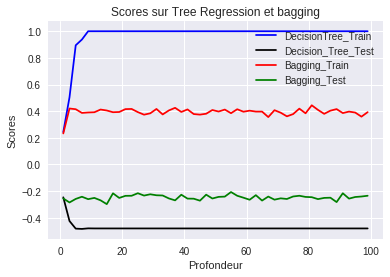

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


score_train_Bag = []
score_test_Bag = []

score_train_DTR = []
score_test_DTR = []

for max_d in range(1, 100, 2):

    # Decision Tree Simple
    DTR = DecisionTreeRegressor(max_depth=max_d)

    DTR.fit(X_train, y_train)
    score_train_DTR.append(DTR.score(X_train, y_train))
    score_test_DTR.append(DTR.score(X_test, y_test))

    # Bagging sous-échantillonné sans remise
    bagging_bsp_f = BaggingRegressor(DecisionTreeRegressor(max_depth=max_d), n_estimators=100,
                                     bootstrap=False, max_samples=10)
    bagging_bsp_f.fit(X_train, y_train)
    score_train_Bag.append(bagging_bsp_f.score(X_train, y_train))
    score_test_Bag.append(bagging_bsp_f.score(X_test, y_test))


plt.plot(range(1, 100, 2), score_train_DTR, c='b', label='DecisionTree_Train')
plt.plot(range(1, 100, 2), score_test_DTR,
         c='black', label='Decision_Tree_Test')


plt.plot(range(1, 100, 2), score_train_Bag, c='r', label='Bagging_Train')
plt.plot(range(1, 100, 2), score_test_Bag, c='g', label='Bagging_Test')

plt.title("Scores sur Tree Regression et bagging")
plt.legend(loc=1, numpoints=1)
plt.ylabel('Scores')
plt.xlabel('Profondeur')

plt.show()

* Ici on voit bien que le bagging sur-apprend beaucoup moins que l'abre de décision lorsqu'il n'y a pas de bootstrap.

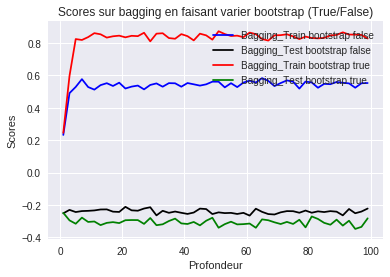

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


score_train_Bag_bt = []
score_test_Bag_bt = []

score_train_Bag_bf = []
score_test_Bag_bf = []

for max_d in range(1, 100, 2):

    # Bagging sous-échantillonné sans remise (avec bootstrap = FALSE)
    bagging_bsp_f = BaggingRegressor(DecisionTreeRegressor(max_depth=max_d), n_estimators=100,
                                     bootstrap=False, max_samples=0.3)
    bagging_bsp_f.fit(X_train, y_train)
    score_train_Bag_bf.append(bagging_bsp_f.score(X_train, y_train))
    score_test_Bag_bf.append(bagging_bsp_f.score(X_test, y_test))

    # Bagging sous-échantillonné avec remise (avec bootstrap = TRUE)
    bagging_bsp_t = BaggingRegressor(DecisionTreeRegressor(max_depth=max_d), n_estimators=100,
                                     bootstrap=True, max_samples=1.0)
    bagging_bsp_t.fit(X_train, y_train)
    score_train_Bag_bt.append(bagging_bsp_t.score(X_train, y_train))
    score_test_Bag_bt.append(bagging_bsp_t.score(X_test, y_test))


plt.plot(range(1, 100, 2), score_train_Bag_bf, c='b',
         label='Bagging_Train bootstrap false')
plt.plot(range(1, 100, 2), score_test_Bag_bf, c='black',
         label='Bagging_Test bootstrap false')


plt.plot(range(1, 100, 2), score_train_Bag_bt,
         c='r', label='Bagging_Train bootstrap true')
plt.plot(range(1, 100, 2), score_test_Bag_bt,
         c='g', label='Bagging_Test bootstrap true')

plt.title("Scores sur bagging en faisant varier bootstrap (True/False)")
plt.legend(loc=1, numpoints=1)
plt.ylabel('Scores')
plt.xlabel('Profondeur')

plt.show()

* On voit bien ici que le bagging limite le sur-apprentissage.

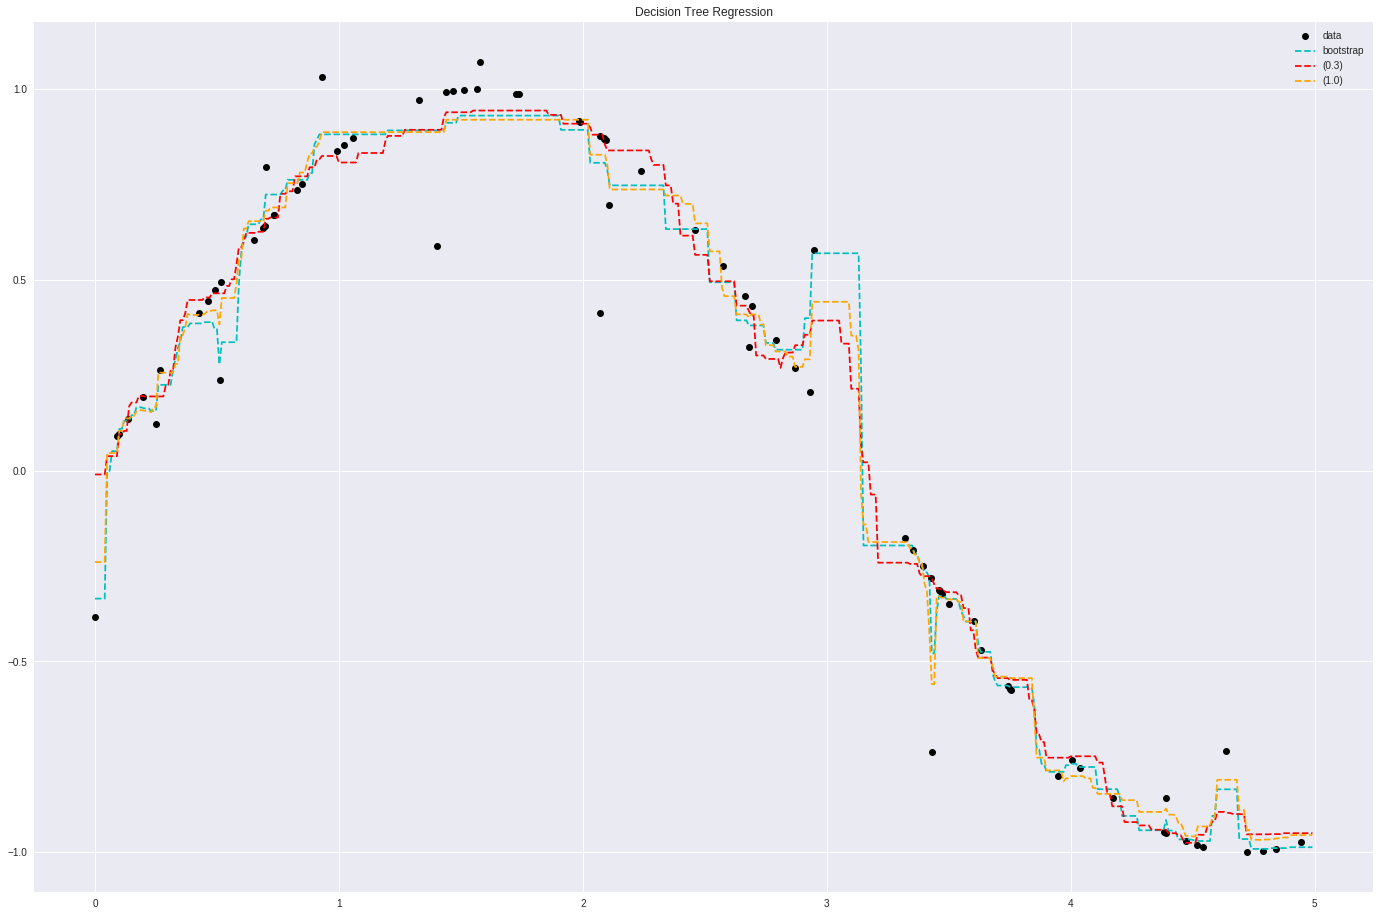

In [38]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))

n_estimators = 10  # L in the text
tree_max_depth = 5

# define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=tree_max_depth)

bagging_bs = BaggingRegressor(n_estimators=n_estimators, base_estimator=tree)
bagging_bs.fit(X, y)

bagging_us_03 = BaggingRegressor(
    n_estimators=n_estimators, base_estimator=tree, bootstrap=False, max_samples=0.3)
bagging_us_03.fit(X, y)

bagging_us_07 = BaggingRegressor(
    n_estimators=n_estimators, base_estimator=tree, bootstrap=True, max_samples=1.0)
bagging_us_07.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_bagging_bs = bagging_bs.predict(X_test)
y_bagging_us_03 = bagging_us_03.predict(X_test)
y_bagging_us_07 = bagging_us_07.predict(X_test)

# Plot the results
plt.figure(figsize=(24, 16))
plt.plot(X, y, 'o', c="black", label="data")
plt.plot(X_test, y_bagging_bs, '--', c="c",
         label="bootstrap", markersize=1)
plt.plot(X_test, y_bagging_us_03, '--', c="r",
         label="(0.3)", markersize=1)
plt.plot(X_test, y_bagging_us_07, '--', c="orange",
         label="(1.0)", markersize=1)
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

# Random Forests

### Q6 - Évaluez le score par 7-fold cross-validation des Random Forests sur les datasets boston, diabetes, iris et digits. Comparez ces performances avec celles d’un SVM linéaire.

In [12]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR, SVC
from sklearn.tree import DecisionTreeClassifier

In [13]:
# import some data to play with
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# import some data to play with
boston = datasets.load_boston()
X_boston = boston.data
y_boston = boston.target

# import some data to play with
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# import some data to play with
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

In [14]:
clf_rf = RandomForestClassifier(max_depth=2)
scores = cross_val_score(
    clf_rf, X_iris, y_iris, cv=7, scoring='f1_macro')
print('Score iris RF', ' ', scores, 'moyenne = ', scores.mean())
print('\n')
svc_iris = SVC()
scores = cross_val_score(
    svc_iris, X_iris, y_iris, cv=7, scoring='f1_macro')
print('Score iris SVC', ' ', scores, 'moyenne = ', scores.mean())

Score iris RF   [ 0.91666667  1.          0.9047619   0.95213675  0.95213675  1.          1.        ] moyenne =  0.960814582243


Score iris SVC   [ 0.95816993  1.          0.95213675  0.95213675  0.9047619   0.95213675
  1.        ] moyenne =  0.959906013688


In [15]:
rf_boston = RandomForestRegressor()
scores = cross_val_score(
    rf_boston, X_boston, y_boston, cv=7)
print('Score boston RF', ' ', scores, 'moyenne = ', scores.mean())
print('\n')
svr_boston = LinearSVR(loss='squared_epsilon_insensitive')
scores = cross_val_score(
    svr_boston, X_boston, y_boston, cv=7)
print('Score boston SVR', ' ', scores, 'moyenne = ', scores.mean())

Score boston RF   [ 0.72298737  0.82022135  0.76527976  0.77365655  0.69310784  0.35033931
  0.42924307] moyenne =  0.650690750073


Score boston SVR   [ 0.45342564  0.28057604 -0.15831494  0.42475633 -6.67158507 -0.18902886
  0.24597859] moyenne =  -0.80202746532


In [16]:
rf_digits = RandomForestRegressor()
scores = cross_val_score(
    rf_digits, X_digits, y_digits, cv=7)
print('Score digits RF', ' ', scores, 'moyenne = ', scores.mean())
print('\n')
svr_digits = LinearSVR(loss='squared_epsilon_insensitive')
scores = cross_val_score(
    svr_digits, X_digits, y_digits, cv=7)
print('Score digits SVR', ' ', scores, 'moyenne = ', scores.mean())

Score digits RF   [ 0.6864924   0.82346518  0.72654174  0.82408494  0.84567634  0.79224531
  0.73351084] moyenne =  0.776002392452


Score digits SVR   [ 0.22698241  0.24544778  0.39159636  0.33284896  0.33840813 -0.33207984
  0.32487435] moyenne =  0.218296879527


In [17]:
rf_diabetes = RandomForestRegressor()
scores = cross_val_score(
    rf_diabetes, X_diabetes, y_diabetes, cv=7)
print('Score diabetes RF', ' ', scores, 'moyenne = ', scores.mean())
print('\n')
svr_diabetes = LinearSVR(loss='squared_epsilon_insensitive')
scores = cross_val_score(
    svr_diabetes, X_diabetes, y_diabetes, cv=7)
print('Score diabetes SVR', ' ', scores, 'moyenne = ', scores.mean())

Score diabetes RF   [ 0.26899263  0.27889314  0.45753432  0.34988327  0.44300256  0.21895128
  0.47408508] moyenne =  0.355906041205


Score diabetes SVR   [ 0.39045654  0.36294998  0.54043144  0.4485521   0.47247195  0.4201566
  0.53545034] moyenne =  0.452924137899


### Q7 - En utilisant le dataset iris restreint aux deux premières variables explicatives afficher la probabilité de prédiction des classes. On partira du script suivant et on fera varier le nombre d’arbres aléatoires (variable n_estimators).

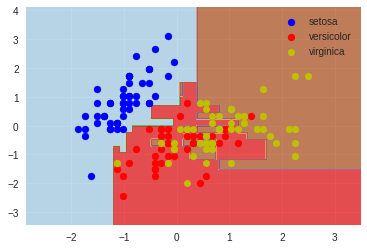

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.figure()
for tree in model.estimators_:
    # TODO use predict to obtain the probabilities you will store in Z
    feat = np.stack((xx.flatten(), yy.flatten()), axis=-1)
    Z = model.predict(feat)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")
# Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()

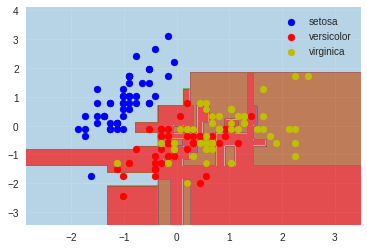

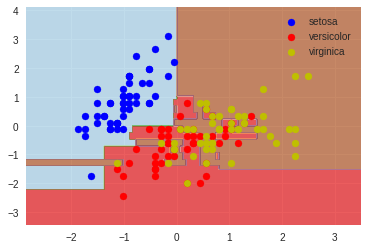

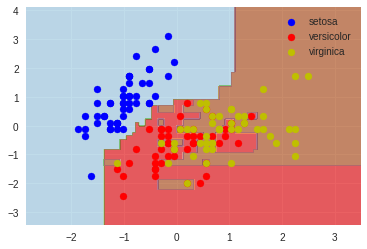

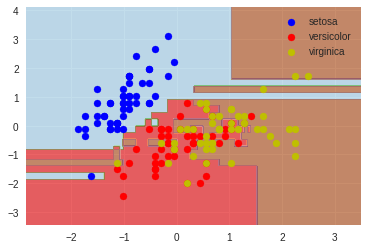

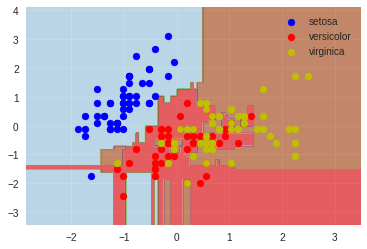

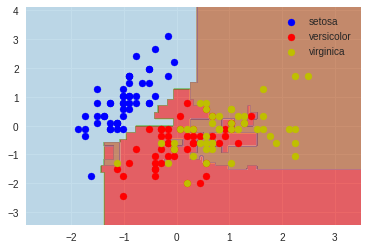

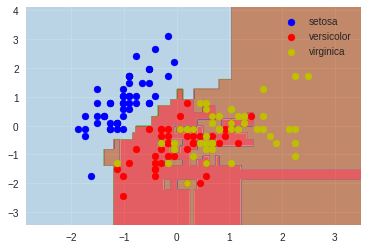

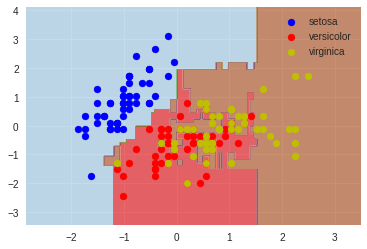

In [26]:
# Parameters
n_estimators = range(2,10)
plot_colors = "bry"
plot_step = 0.02

for i in n_estimators:
    # Load data
    iris = load_iris()
    X_unscaled, y = iris.data[:, :2], iris.target
    # Standardize
    X = preprocessing.scale(X_unscaled)
    # RF fitting
    model = RandomForestClassifier(n_estimators=i)
    clf = model.fit(X, y)
    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.figure()
    for tree in model.estimators_:
        # TODO use predict to obtain the probabilities you will store in Z
        feat = np.stack((xx.flatten(), yy.flatten()), axis=-1)
        Z = model.predict(feat)
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=1. / i, cmap=plt.cm.Paired)
    plt.axis("tight")
    # Plot the training points
    for i, c in zip(range(3), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.legend(scatterpoints=1)
plt.show()

### Q8 - Comparez les scores par 6-fold cross-validation des Random Forests et des arbres de décisions pures (obtenus avec DecisionTreeClassifier), sur le dataset iris restreint aux deux premières variables explicatives. On fera varier le paramètre max_depth entre 1 et 30. Mettre en évidence le fait que les Random Forests permettent de réduire le sur-apprentissage, et ce même pour des arbres profonds.

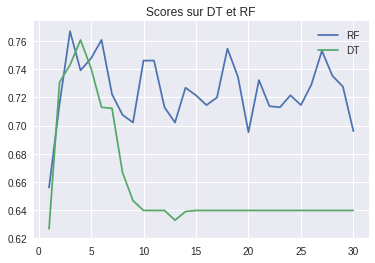

In [19]:
from sklearn.utils import shuffle
# Load data
iris = load_iris()
X_iris, y_iris = iris.data[:, :2], iris.target
X_iris, y_iris = shuffle(X_iris, y_iris, random_state=0)
s_rf = []
s_dt = []


for i in range(1, 31):
    clf_rf = RandomForestClassifier(max_depth=i)
    scores_rf = cross_val_score(
         clf_rf, X_iris, y_iris, cv=6, scoring='accuracy').mean()
    s_rf.append(scores_rf)
    
for i in range(1, 31):
    clf_dt = DecisionTreeClassifier(random_state=0, max_depth=i)
    scores_dt = cross_val_score(clf_dt, X_iris, y_iris, cv=6, scoring='accuracy').mean()
    s_dt.append(scores_dt)

plt.plot(range(1, 31), s_rf, label='RF')
plt.plot(range(1, 31), s_dt, label='DT')

plt.title("Scores sur DT et RF")
plt.legend(loc=1, numpoints=1)

plt.show()

### Q9

* Montrons que $$f \mapsto  R_{exp}\left ( f \right ) = \mathbb{E}[exp(-Yf(X))]$$ minimise $$f_{exp}^{*} \mapsto  \frac{1}{2}log\left (\frac{\eta_{(x)}}{1-\eta_{(x)}}\right )$$  

$$R_{exp}\left ( f|x \right ) = \mathbb{E}[exp(-Yf(X))|x]$$


$$argmin_{f}\mathbb{E}[exp(-Yf(X))] = argmin_{f}\mathbb{E}\left [ \mathbb{E}[exp(-Yf(X)|x)]\right ] = \mathbb{E} \left [ argmin_{f} \mathbb{E}[exp(-Yf(X)|x)]\right ] = argmin_{f} \mathbb{E}[exp(-Yf(X)|x)]$$


$$R_{exp}\left ( f|x \right ) = \mathbb{E}[exp(-Yf(X))|x] = exp(f(X))\mathbb{P}(Y = -1|x)+ exp(-f(X))\mathbb{P}(Y = 1|x)$$

$$\frac{\partial R_{exp}\left ( f|x \right )}{\partial(f(x))} = exp(f(X))\mathbb{P}(Y = -1|x) - exp(-f(X))\mathbb{P}(Y = 1|x)$$


$$\frac{\partial R_{exp}\left ( f|x \right )}{\partial(f(x))} =0 \Leftrightarrow  exp(f(X))\mathbb{P}(Y = -1|x) - exp(-f(X))\mathbb{P}(Y = 1|x) = 0$$
$$\Leftrightarrow 2f(x) = log(\mathbb{P}(Y = 1|x)) - log(\mathbb{P}(Y = -1|x))$$
$$\Leftrightarrow f(x) =  \frac{1}{2}log\left (\frac{ \mathbb{P}(Y = 1|x) }{\mathbb{P}(Y = -1|x) }\right )$$
$$\Leftrightarrow f(x) =  \frac{1}{2}log\left (\frac{\eta_{(x)}}{1-\eta_{(x)}}\right )$$ 

### Q10

$$(2\eta_{(x)} - 1) = sign\frac{1}{2}log\left (\frac{\eta_{(x)}}{1-\eta_{(x)}}\right )$$


$$\frac{1}{2}log\left (\frac{\eta_{(x)}}{1-\eta_{(x)}}\right ) > 0 \Leftrightarrow log\left (\frac{\eta_{(x)}}{1-\eta_{(x)}}\right ) > 0 \Leftrightarrow \frac{\eta_{(x)}}{1-\eta_{(x)}} > 1 \Leftrightarrow \eta_{(x)} > 1 - \eta_{(x)} \Leftrightarrow 2\eta_{(x)} - 1 > 0$$

$$\frac{1}{2}log\left (\frac{\eta_{(x)}}{1-\eta_{(x)}}\right ) < 0  \Leftrightarrow 2\eta_{(x)} - 1 < 0$$


$$\frac{1}{2}log\left (\frac{\eta_{(x)}}{1-\eta_{(x)}}\right ) = 0  \Leftrightarrow 2\eta_{(x)} - 1 = 0$$


$$ h_{exp}^{*} = sign\left (\frac{1}{2}log\left (\frac{\eta_{(x)}}{1-\eta_{(x)}}\right )\right ) = sign \left (2\eta - 1 \right ) = h_{\varphi _{0}}^{*}$$

### Q11

$$ C_{m} = \frac{1}{2}log\left (\frac{\mathbb{P}_{\omega} m-1((Y = \widehat{h}_{m}(X)) }{\mathbb{P}_{\omega}m-1(Y \neq \widehat{h}_{m}(X))}\right ) $$

$$ C_{m} = argmin_{c\in \mathbb{R}}  \mathbb{E}_{\omega ^{m-1}}\left [ exp(-c . Y.\widehat{h}_{m}(X)) \right ]$$

$$ argmin_{c\in \mathbb{R}} \frac{1}{n} \sum_{i=1}^{n}\omega _{i}^{m-1}\left [ exp(-c . Y_{i}.\widehat{h}_{m}(X_{i})) \right ]$$


$$ argmin_{c\in \mathbb{R}} \sum_{i=1}^{n}\omega _{i}^{m-1}\left [ exp(-c . Y_{i}.\widehat{h}_{m}(X_{i})) \right ]$$

$$ argmin_{c\in \mathbb{R}} exp(-c)\sum_{i|Y_{i}=\widehat{h}_{m}(X_{i})}^{n}\omega _{i}^{m-1}+exp(c) \sum_{i|Y_{i}\neq\widehat{h}_{m}(X_{i})}^{n}\omega _{i}^{m-1}$$


$$ argmin_{c\in \mathbb{R}} exp(-c)\sum_{i}^{n}\omega _{i}^{m-1} 1_{i|Y_{i}=\widehat{h}_{m}(X_{i})}+exp(c) \sum_{i}^{n}\omega _{i}^{m-1}1_{i|Y_{i}\neq\widehat{h}_{m}(X_{i})}$$

$$ argmin_{c\in \mathbb{R}} exp(-c) \mathbb{P}\omega^{m-1} [Y=\widehat{h}_{m}(X)]+ exp(c) \mathbb{P}\omega^{m-1} [Y\neq\widehat{h}_{m}(X)]$$



$$\frac{\partial R_{exp}\left (\mathbb{E}_{\omega ^{m-1}}\left [ exp(-c . Y.\widehat{h}_{m}(X)) \right ] \right )}{\partial(c)} = 0 $$
$$\Leftrightarrow exp(-c) \mathbb{P}\omega^{m-1} [Y=\widehat{h}_{m}(X)]+ exp(c) \mathbb{P}\omega^{m-1} [Y\neq\widehat{h}_{m}(X)] = 0$$ 
$$ \Leftrightarrow  C_{m} = \frac{1}{2}log\left (\frac{\mathbb{P}_{\omega} m-1((Y = \widehat{h}_{m}(X)) }{\mathbb{P}_{\omega}m-1(Y \neq \widehat{h}_{m}(X))}\right ) $$

### Q13

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
x = []
y = []
for i in [1, 2, 10]:
    print("creating classifier")
    abdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i),
                             algorithm="SAMME",
                             n_estimators=200)

    scores = cross_val_score(
                 abdt, X_digits, y_digits, cv=6, scoring='f1_macro')
    
    print('Score iris DT' , ' ' , scores)

creating classifier
Score iris DT   [ 0.69918969  0.79911507  0.77806122  0.84527361  0.83172778  0.79602071]
creating classifier
Score iris DT   [ 0.83152009  0.88052283  0.86324356  0.91303035  0.8861814   0.8705887 ]
creating classifier
Score iris DT   [ 0.95338803  0.97076911  0.96995689  0.98320091  0.9830052   0.93533838]


### Q14 - Appliquer AdaBoost sur les données digits découpées en deux échantillons : apprentissage (75%) et test (25%). Tracer les erreurs (0/1) d’apprentissage et de test en fonction du nombre d’itérations.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
     X_digits, y_digits, test_size=0.25, random_state=42)

abdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                          algorithm="SAMME",
                          n_estimators=200)

scores = cross_val_score(
    abdt, X_train, y_train, cv=6, scoring='f1_macro').mean()
print('Score iris ADABoost & DT', ' ', scores)

abdt.fit(X_train, y_train)
res = abdt.predict(X_test)

Score iris ADABoost & DT   0.834604588286


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
     X_digits, y_digits, test_size=0.25, random_state=42)

abdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=40),
                          algorithm="SAMME",
                          n_estimators=200)

scores = cross_val_score(
    abdt, X_train, y_train, cv=6, scoring='f1_macro').mean()
print('Score iris ADABoost & DT', ' ', scores)

abdt.fit(X_train, y_train)
res = abdt.predict(X_test)

Score iris ADABoost & DT   0.833618289688


### Q15 - Que remarquez vous ? Que se passe-t-il si la profondeur des arbres de classification est grande ?

* On remarque que le score s'améliore. Par conséquent l'erreur sera aussi diminuée.